In [1]:
# import dependecies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from citipy import citipy
from datetime import datetime 
# Import the requests library.
import requests
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Import the API key.
from config import weather_api_key

ImportError: cannot import name 'weather_api_key' from 'config' (C:\Users\caroc\Desktop\DataViz\World_Weather_Analysis\config.py)

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

767

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=492532aee06bc76badf06766a9613397


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | luba
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | norrtalje
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | beri
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | alyangula
Processing Reco

Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | antofagasta
Processing Record 40 of Set 4 | vao
Processing Record 41 of Set 4 | aurora
Processing Record 42 of Set 4 | avera
Processing Record 43 of Set 4 | sheridan
Processing Record 44 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 45 of Set 4 | khorixas
Processing Record 46 of Set 4 | lucapa
Processing Record 47 of Set 4 | letlhakeng
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | flin flon
Processing Record 50 of Set 4 | daan
Processing Record 1 of Set 5 | gimli
Processing Record 2 of Set 5 | yabelo
Processing Record 3 of Set 5 | pitimbu
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | nalut
Processing Record 6 of Set 5 | ketchikan
Processing Record 7 of Set 5 | trairi
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | agirish
Processing Record 10 of Set 5 | sioux lookout
Processing Record 11 of Set 5 | inyonga
Processing Re

Processing Record 25 of Set 8 | anicuns
Processing Record 26 of Set 8 | balabac
Processing Record 27 of Set 8 | faya
Processing Record 28 of Set 8 | imeni zhelyabova
Processing Record 29 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 30 of Set 8 | praia
Processing Record 31 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 32 of Set 8 | tchaourou
Processing Record 33 of Set 8 | port-gentil
Processing Record 34 of Set 8 | odweyne
Processing Record 35 of Set 8 | san cristobal
Processing Record 36 of Set 8 | pisco
Processing Record 37 of Set 8 | tuatapere
Processing Record 38 of Set 8 | nestorion
City not found. Skipping...
Processing Record 39 of Set 8 | marystown
Processing Record 40 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 41 of Set 8 | santa rosa
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | kuandian
Processing Record 44 of Set 8 | maryville
Processing Record 45 of Set 8 | jalu
Processing Record 46

Processing Record 10 of Set 12 | urengoy
Processing Record 11 of Set 12 | lisakovsk
Processing Record 12 of Set 12 | qingan
City not found. Skipping...
Processing Record 13 of Set 12 | novobirilyussy
Processing Record 14 of Set 12 | majene
Processing Record 15 of Set 12 | kupang
Processing Record 16 of Set 12 | vanersborg
Processing Record 17 of Set 12 | kologriv
Processing Record 18 of Set 12 | mount gambier
Processing Record 19 of Set 12 | colares
Processing Record 20 of Set 12 | ixtapa
Processing Record 21 of Set 12 | havelock
Processing Record 22 of Set 12 | havre-saint-pierre
Processing Record 23 of Set 12 | tazmalt
Processing Record 24 of Set 12 | dharchula
Processing Record 25 of Set 12 | paradwip
City not found. Skipping...
Processing Record 26 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 27 of Set 12 | kungurtug
Processing Record 28 of Set 12 | sao joao da barra
Processing Record 29 of Set 12 | wonogiri
Processing Record 30 of Set 12 | peleduy
Processin

Processing Record 44 of Set 15 | adre
Processing Record 45 of Set 15 | verdun
Processing Record 46 of Set 15 | dauphin
Processing Record 47 of Set 15 | surt
Processing Record 48 of Set 15 | artyk
City not found. Skipping...
Processing Record 49 of Set 15 | phan thiet
Processing Record 50 of Set 15 | chase
Processing Record 1 of Set 16 | victor harbor
Processing Record 2 of Set 16 | scottsburgh
City not found. Skipping...
Processing Record 3 of Set 16 | kangaatsiaq
Processing Record 4 of Set 16 | show low
Processing Record 5 of Set 16 | fort morgan
Processing Record 6 of Set 16 | narasannapeta
Processing Record 7 of Set 16 | ordzhonikidze
Processing Record 8 of Set 16 | kailua
Processing Record 9 of Set 16 | rorvik
Processing Record 10 of Set 16 | eenhana
Processing Record 11 of Set 16 | kamenka
Processing Record 12 of Set 16 | general roca
Processing Record 13 of Set 16 | kruisfontein
Processing Record 14 of Set 16 | menongue
Processing Record 15 of Set 16 | galesong
Processing Record 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,67.96,77,92,20.60,PF,2020-09-01 22:16:46
1,Bluff,-46.60,168.33,43.66,68,51,9.35,NZ,2020-09-01 22:16:46
2,Hobart,-42.88,147.33,44.01,81,75,6.96,AU,2020-09-01 22:16:47
3,Provideniya,64.38,-173.30,50.00,57,75,6.71,RU,2020-09-01 22:12:11
4,Luba,3.46,8.55,76.62,84,100,6.93,GQ,2020-09-01 22:16:47
5,Hermanus,-34.42,19.23,60.01,85,100,4.00,ZA,2020-09-01 22:16:47
6,Atuona,-9.80,-139.03,79.14,73,18,20.36,PF,2020-09-01 22:15:10
7,Cape Town,-33.93,18.42,61.00,87,40,13.87,ZA,2020-09-01 22:15:00
8,Norrtalje,59.76,18.70,55.99,81,0,3.69,SE,2020-09-01 22:16:48
9,Klaksvik,62.23,-6.59,51.80,100,80,16.11,FO,2020-09-01 22:16:48


In [8]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"  ]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-09-01 22:16:46,-23.12,-134.97,67.96,77,92,20.60
1,Bluff,NZ,2020-09-01 22:16:46,-46.60,168.33,43.66,68,51,9.35
2,Hobart,AU,2020-09-01 22:16:47,-42.88,147.33,44.01,81,75,6.96
3,Provideniya,RU,2020-09-01 22:12:11,64.38,-173.30,50.00,57,75,6.71
4,Luba,GQ,2020-09-01 22:16:47,3.46,8.55,76.62,84,100,6.93
...,...,...,...,...,...,...,...,...,...
691,Kruisfontein,ZA,2020-09-01 22:19:14,-34.00,24.73,62.01,67,100,7.00
692,Menongue,AO,2020-09-01 22:19:14,-14.66,17.69,64.71,52,35,2.30
693,Galesong,ID,2020-09-01 22:19:15,-5.32,119.37,73.40,100,20,2.24
694,Tukrah,LY,2020-09-01 22:19:15,32.53,20.58,74.98,76,0,6.80


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

## Plot Weather Data 

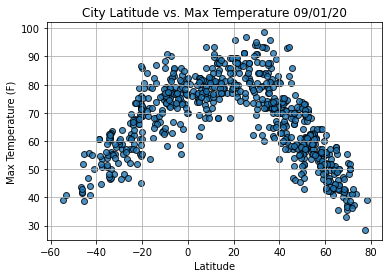

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

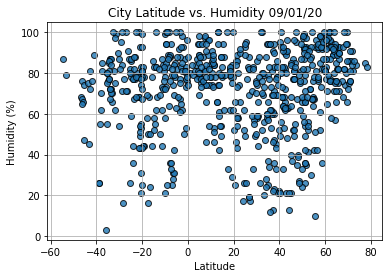

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

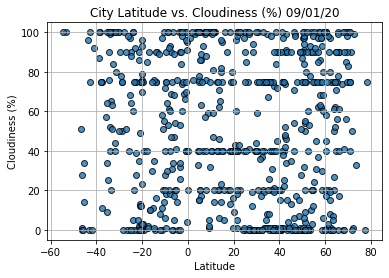

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

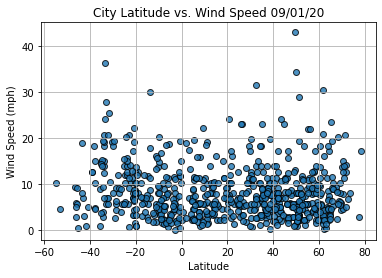

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Determine correlations

### Correlation between latitude & max temp

In [16]:
# # Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

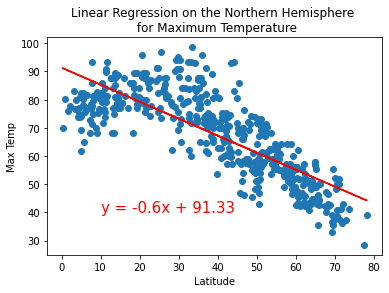

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

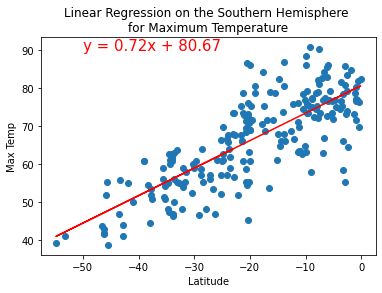

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

### Correlation between latitude and % humidity 

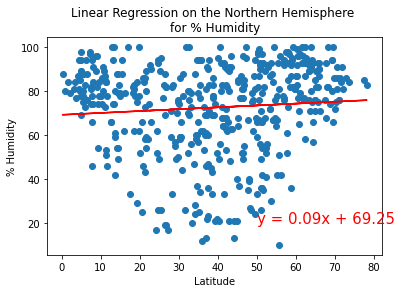

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(50,20))

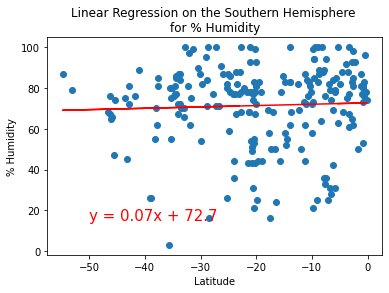

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

### Find correlation between latitude and % cloudiness 

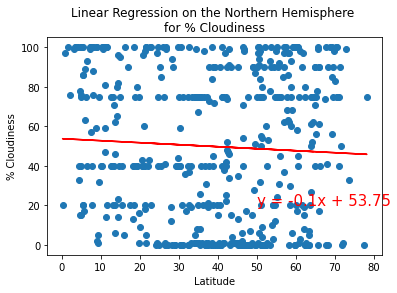

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,20))

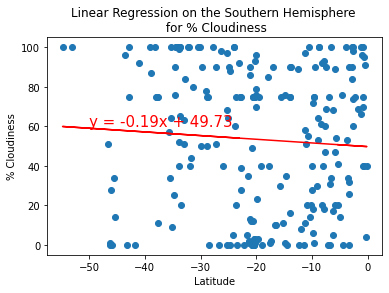

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

### Correlation between latitude & wind speed

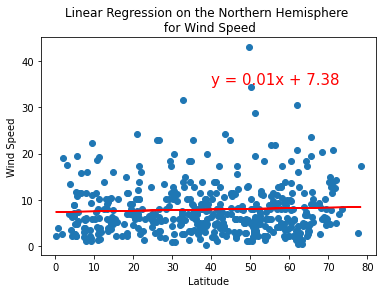

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

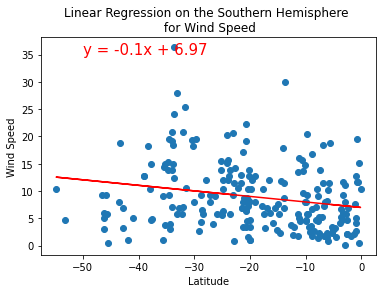

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
se